In [1]:
import numpy as np
import pandas as pd
import pickle
import gc
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_bins(df, col, n_bins=10, code=False):
    if not code:
        bins = pd.cut(df[col], bins=n_bins)
        bins = bins.value_counts()
        bins = bins.sort_index()
        bins.to_csv(f'bins/{col}_{n_bins}.sv')
        plt.bar(range(len(bins)), bins.values, tick_label=np.arange(1, len(bins)+1)/len(bins))
        plt.xticks(fontsize=10);
        
    else:
        fig, ax = plt.subplots(1, 2, figsize=(20, 8))
        var = len(df[df.isna()[col]])
        df = df[~df.isna()[col]]
        var2 = len(df)
        bins = pd.cut(df[col], bins=n_bins)
        bins = bins.value_counts()
        bins = bins.sort_index()
        bins.to_csv(f'bins/{col}_{n_bins}.sv')
        ax[0].bar(range(len(bins)), bins.values, tick_label=np.arange(1, len(bins)+1)/len(bins))
        ax[0].tick_params(axis='both', labelsize=12)
        
        temp = pd.DataFrame({'Nan': [var], 'NotNan': [var2]}, index=['Nan amount'])
        temp.plot(ax=ax[1], kind='bar', stacked=True, width=0.05)
        ax[1].axis('off')
        ax[1].legend(bbox_to_anchor=(0.7, 0.5), prop={'size': 15})

In [15]:
plt.rcParams["figure.figsize"] = (13, 8)

### Group Ratio

In [2]:
with open("gr.bin", "rb") as f:
    gr = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["gr"])

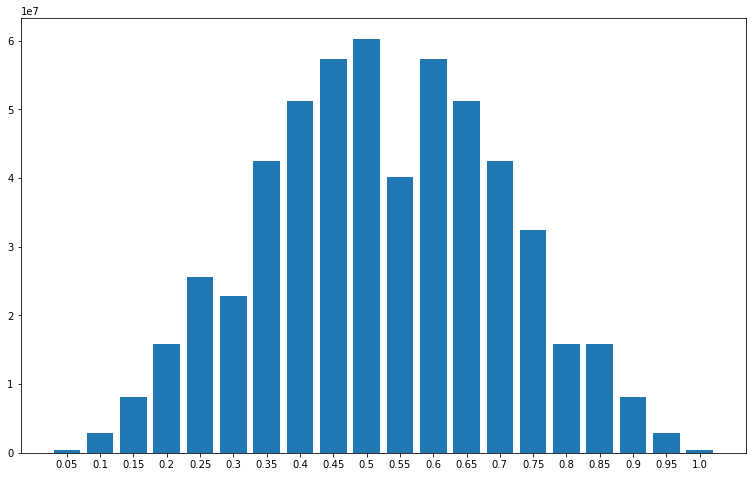

In [149]:
plot_bins(gr, 'gr', 20)

In [206]:
# del gr
# gc.collect()
# gc.get_stats()

[{'collections': 2986, 'collected': 39202, 'uncollectable': 0},
 {'collections': 295, 'collected': 46036, 'uncollectable': 0},
 {'collections': 14, 'collected': 167146, 'uncollectable': 0}]

### Imbalance Ratio

In [3]:
with open("ir.bin", "rb") as f:
    ir = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["ir"])

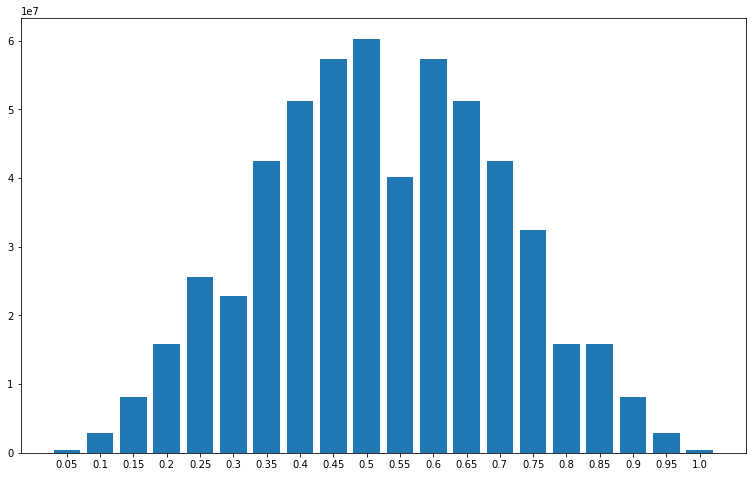

In [156]:
plot_bins(ir, 'ir', 20)

### Check

array([[<AxesSubplot:title={'center':'gr'}>]], dtype=object)

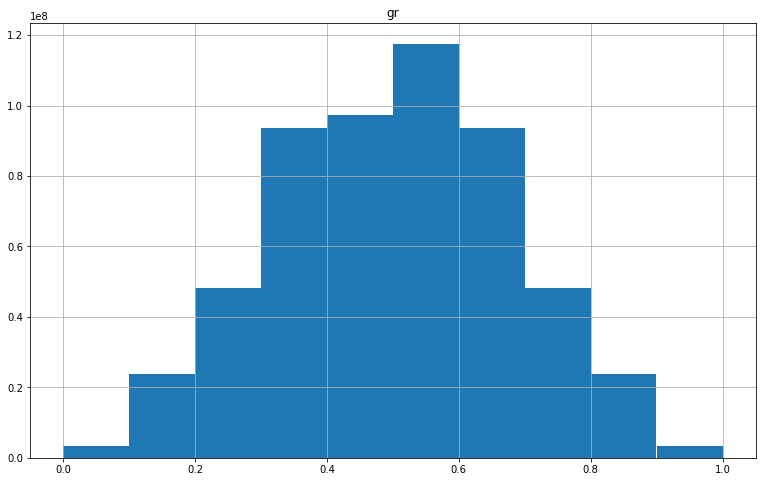

In [165]:
gr.hist()

array([[<AxesSubplot:title={'center':'ir'}>]], dtype=object)

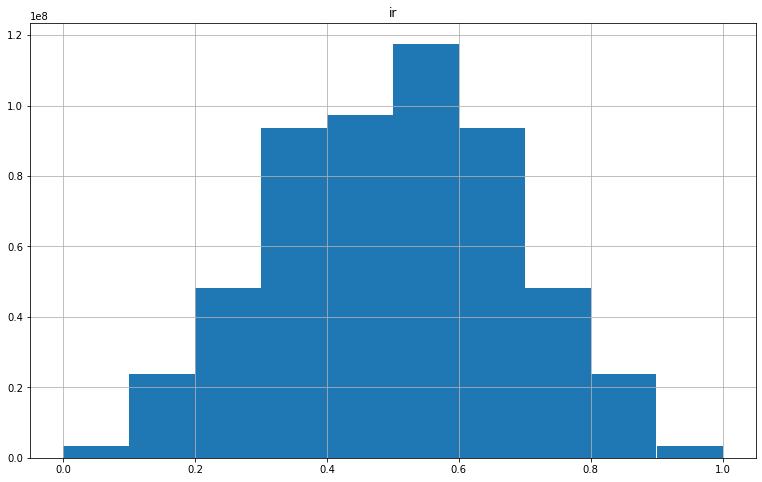

In [166]:
ir.hist()

In [3]:
with open("i_tpr.bin", "rb") as f:
    i_tpr = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["i_tpr"])
with open("j_tpr.bin", "rb") as f:
    j_tpr = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["j_tpr"])

### i_ true positive ratio

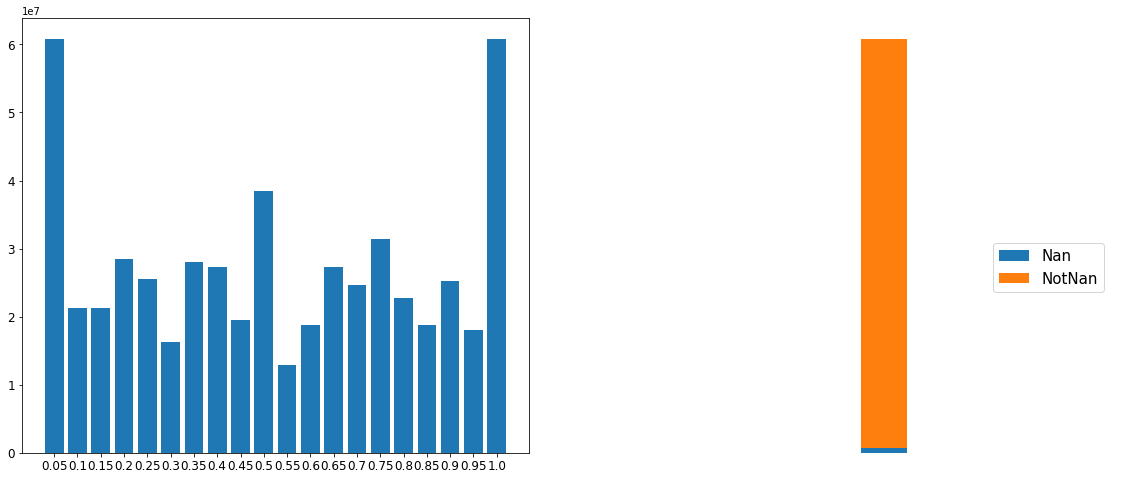

In [4]:
plot_bins(i_tpr, 'i_tpr', 20, True)

### j_ true positive ratio

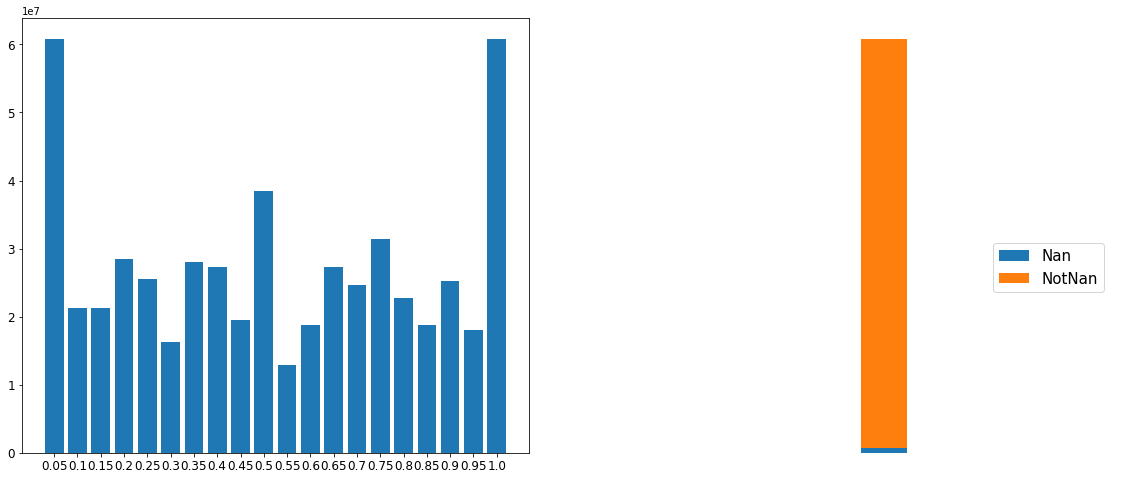

In [5]:
plot_bins(j_tpr, 'j_tpr', 20, True)

In [6]:
with open("i_fpr.bin", "rb") as f:
    i_fpr = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["i_fpr"])
with open("j_fpr.bin", "rb") as f:
    j_fpr = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["j_fpr"])

### i_ false positive ratio

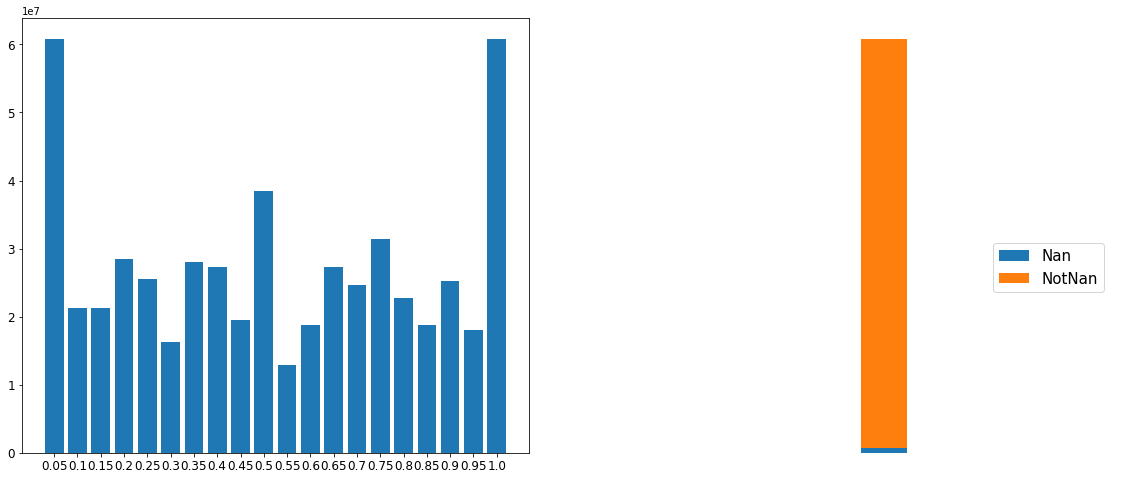

In [7]:
plot_bins(i_fpr, 'i_fpr', 20, True)

### i_ false positive ratio

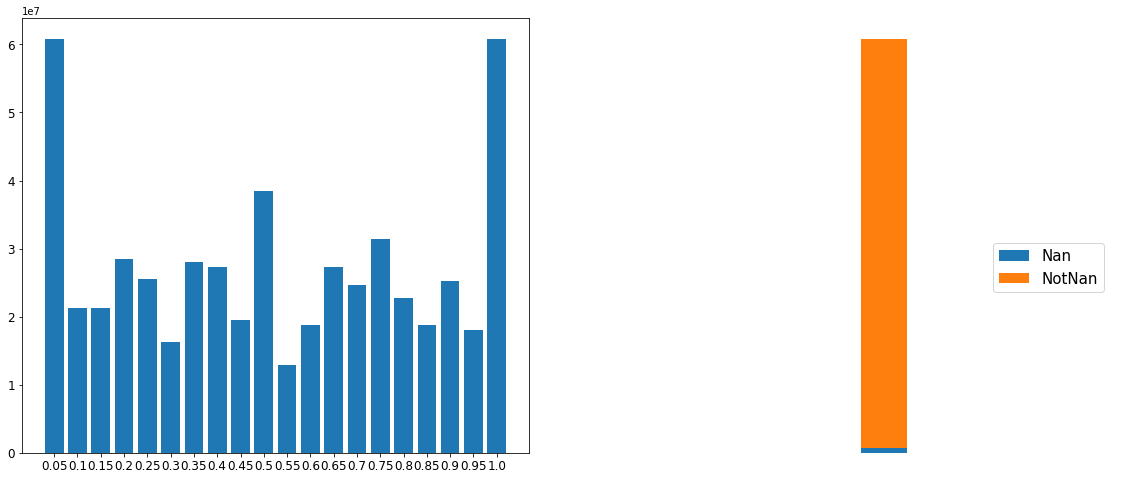

In [8]:
plot_bins(j_fpr, 'j_fpr', 20, True)

In [20]:
with open("i_ppv.bin", "rb") as f:
    i_ppv = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["i_ppv"])
with open("j_ppv.bin", "rb") as f:
    j_ppv = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["j_ppv"])

### i_ positive predictive value

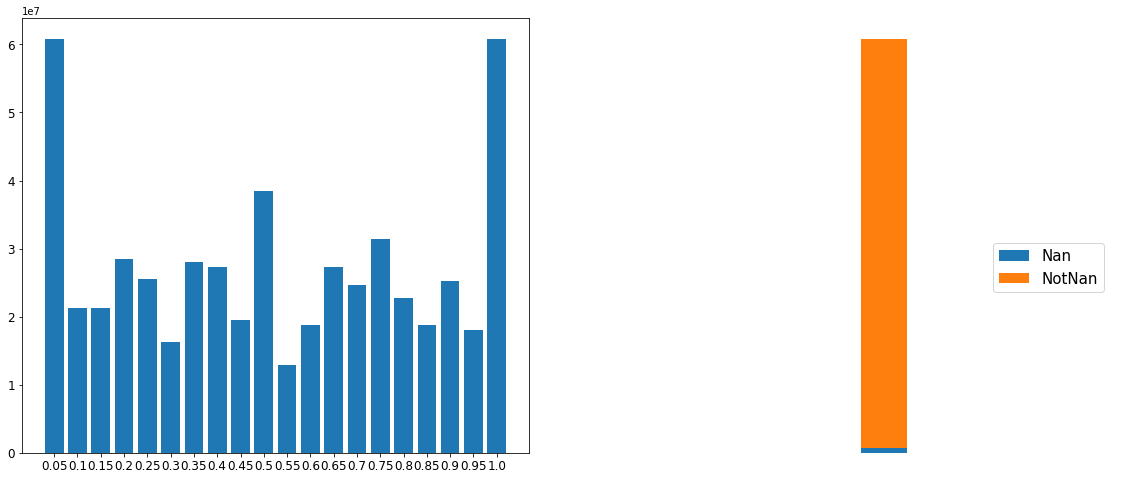

In [21]:
plot_bins(i_ppv, 'i_ppv', 20, True)

### j_ positive predictive value

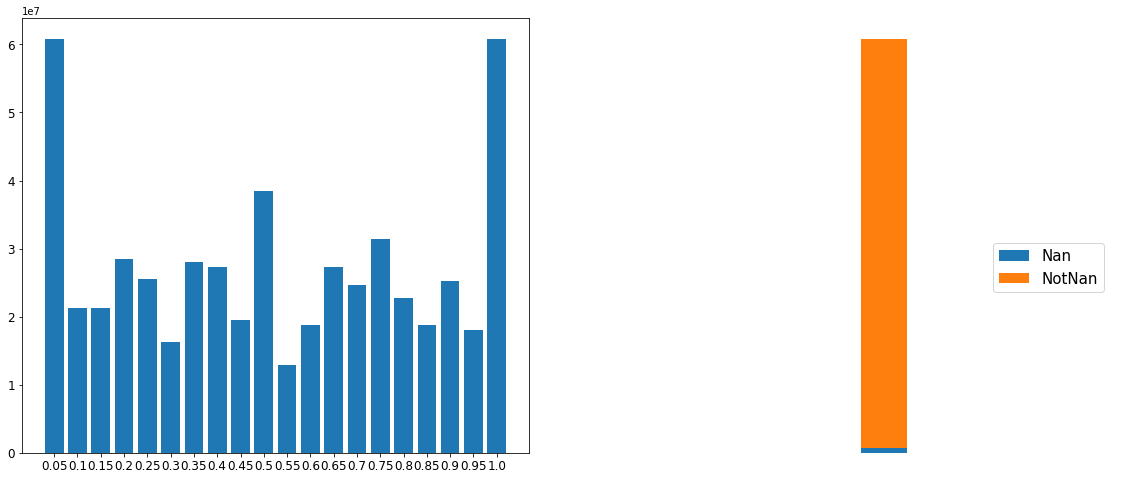

In [22]:
plot_bins(j_ppv, 'j_ppv', 20, True)

In [3]:
with open("i_npv.bin", "rb") as f:
    i_npv = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["i_npv"])
with open("j_npv.bin", "rb") as f:
    j_npv = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["j_npv"])

### i_ negative predictive value

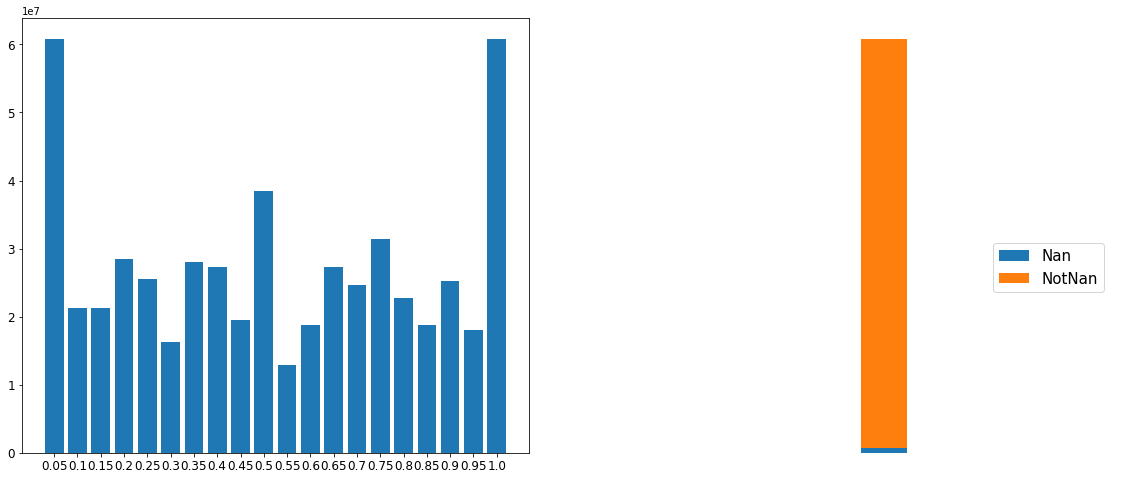

In [4]:
plot_bins(i_npv, 'i_npv', 20, True)

### i_ negative predictive value

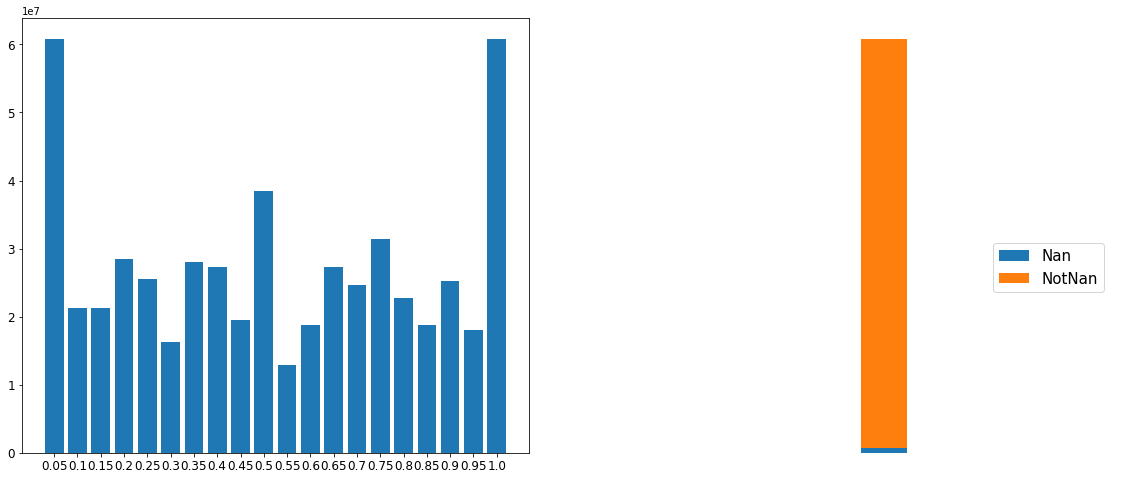

In [5]:
plot_bins(j_npv, 'j_npv', 20, True)

# (Plots each time are done manyaly, because I have to restart kernel after each time to free ram(garbage collector doesn't work in my case))
### -find out problem and kinda automize it; 
### -save all plots to storage

In [4]:
def plot_plot(df, metric):
    fig = (
        ggplot(df, aes(x=metric, y=after_stat('density')))
        + geom_histogram(bins=100)
        + facet_grid('ir~gr', labeller = 'label_both')
        + theme_minimal()
        + theme(figure_size=(16, 8))
        + ylab("Density")
    )
    print(fig)

In [5]:
with open("equal_opp_diff.bin", "rb") as f:
    equal_opp_diff = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["equal_opp_diff"])

In [6]:
df = pd.concat([gr, ir], axis=1)
df = pd.concat([df, equal_opp_diff], axis=1)

In [7]:
ir_selected = [0.25, 0.5, 0.75]
gr_selected = [0.25, 0.5, 0.75]
df = df.loc[df.ir.isin(ir_selected) & df.gr.isin(gr_selected) & (~df['equal_opp_diff'].isna())]

In [8]:
df

,gr,ir,equal_opp_diff
154815,0.25,0.75,0.0
154816,0.25,0.75,0.0
154818,0.25,0.75,0.0
154821,0.25,0.75,0.0
154825,0.25,0.75,0.0
...,...,...,...
552946123,0.75,0.75,0.0
552946150,0.75,0.50,0.0
552946164,0.75,0.75,0.0
552946192,0.75,0.50,0.0


### Equal opportunity difference without Nan

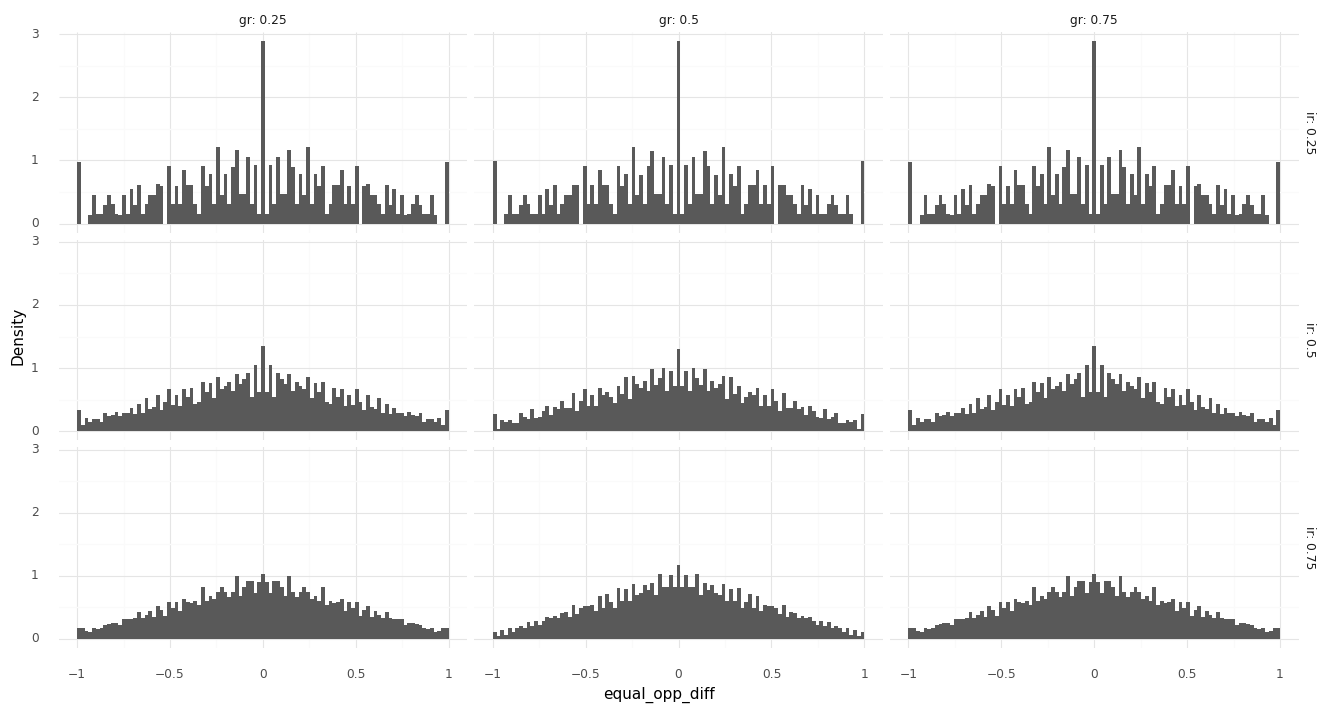

In [9]:
plot_plot(df, 'equal_opp_diff')

In [5]:
with open("equal_opp_ratio.bin", "rb") as f:
    equal_opp_ratio = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["equal_opp_ratio"])

In [6]:
df = pd.concat([gr, ir], axis=1)
df = pd.concat([df, equal_opp_ratio], axis=1)

In [8]:
ir_selected = [0.25, 0.5, 0.75]
gr_selected = [0.25, 0.5, 0.75]
df = df.loc[df.ir.isin(ir_selected) & df.gr.isin(gr_selected) & (~df['equal_opp_ratio'].isna())]

In [9]:
df

,gr,ir,equal_opp_ratio
154815,0.25,0.75,1.0
154816,0.25,0.75,1.0
154818,0.25,0.75,1.0
154821,0.25,0.75,1.0
154825,0.25,0.75,1.0
...,...,...,...
552945179,0.75,0.75,inf
552945205,0.75,0.50,inf
552945219,0.75,0.75,inf
552945246,0.75,0.50,inf


### Equal opportunity ratio without Nan

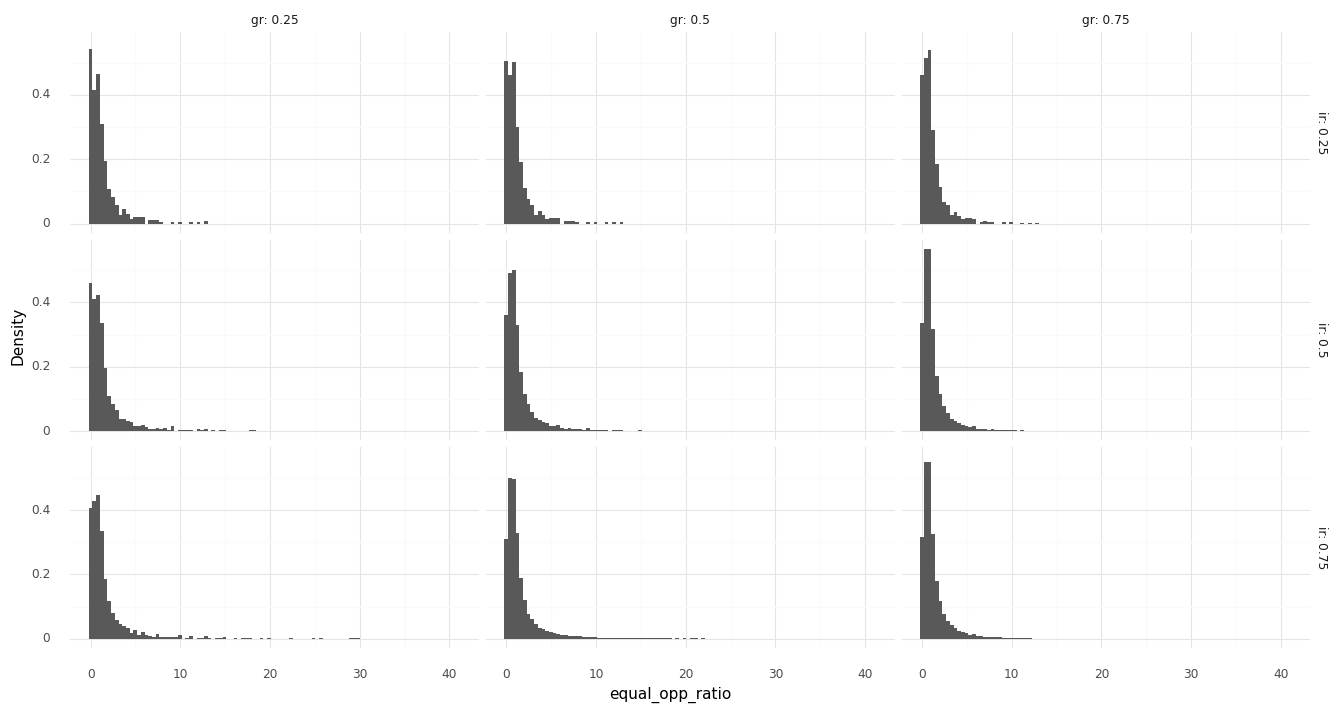

In [10]:
plot_plot(df, 'equal_opp_ratio')

In [4]:
with open("stat_parity.bin", "rb") as f:
    stat_parity = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["stat_parity"])

In [6]:
df = pd.concat([gr, ir], axis=1)
df = pd.concat([df, stat_parity], axis=1)

In [7]:
ir_selected = [0.25, 0.5, 0.75]
gr_selected = [0.25, 0.5, 0.75]
df = df.loc[df.ir.isin(ir_selected) & df.gr.isin(gr_selected) & (~df['stat_parity'].isna())]

In [8]:
df

,gr,ir,stat_parity
116160,0.25,0.75,0.000000
116161,0.25,0.75,-0.071411
116163,0.25,0.75,-0.142822
116166,0.25,0.75,-0.214233
116170,0.25,0.75,-0.285645
...,...,...,...
552946150,0.75,0.50,0.023804
552946164,0.75,0.75,0.023804
552946178,0.75,0.25,0.000000
552946192,0.75,0.50,0.000000


### Statistical parity without Nan

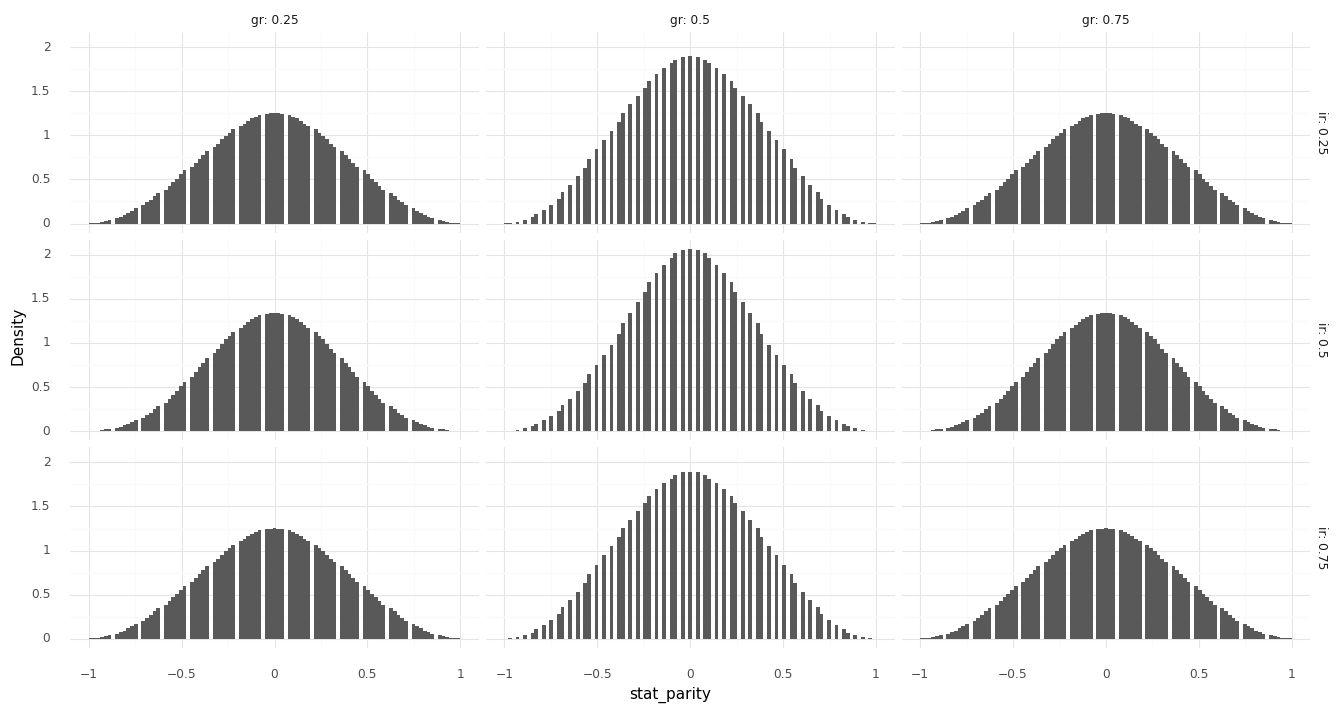

In [11]:
plot_plot(df, 'stat_parity')

In [5]:
with open("disp_impact.bin", "rb") as f:
    disp_impact = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["disp_impact"])

In [6]:
df = pd.concat([gr, ir], axis=1)
df = pd.concat([df, disp_impact], axis=1)

In [7]:
ir_selected = [0.25, 0.5, 0.75]
gr_selected = [0.25, 0.5, 0.75]
df = df.loc[df.ir.isin(ir_selected) & df.gr.isin(gr_selected) & (~df['disp_impact'].isna())]

In [8]:
df

,gr,ir,disp_impact
116160,0.25,0.75,1.000000
116161,0.25,0.75,0.928711
116163,0.25,0.75,0.856934
116166,0.25,0.75,0.785645
116170,0.25,0.75,0.714355
...,...,...,...
552946109,0.75,0.50,inf
552946123,0.75,0.75,inf
552946136,0.75,0.25,inf
552946150,0.75,0.50,inf


### Disparate impact without Nan

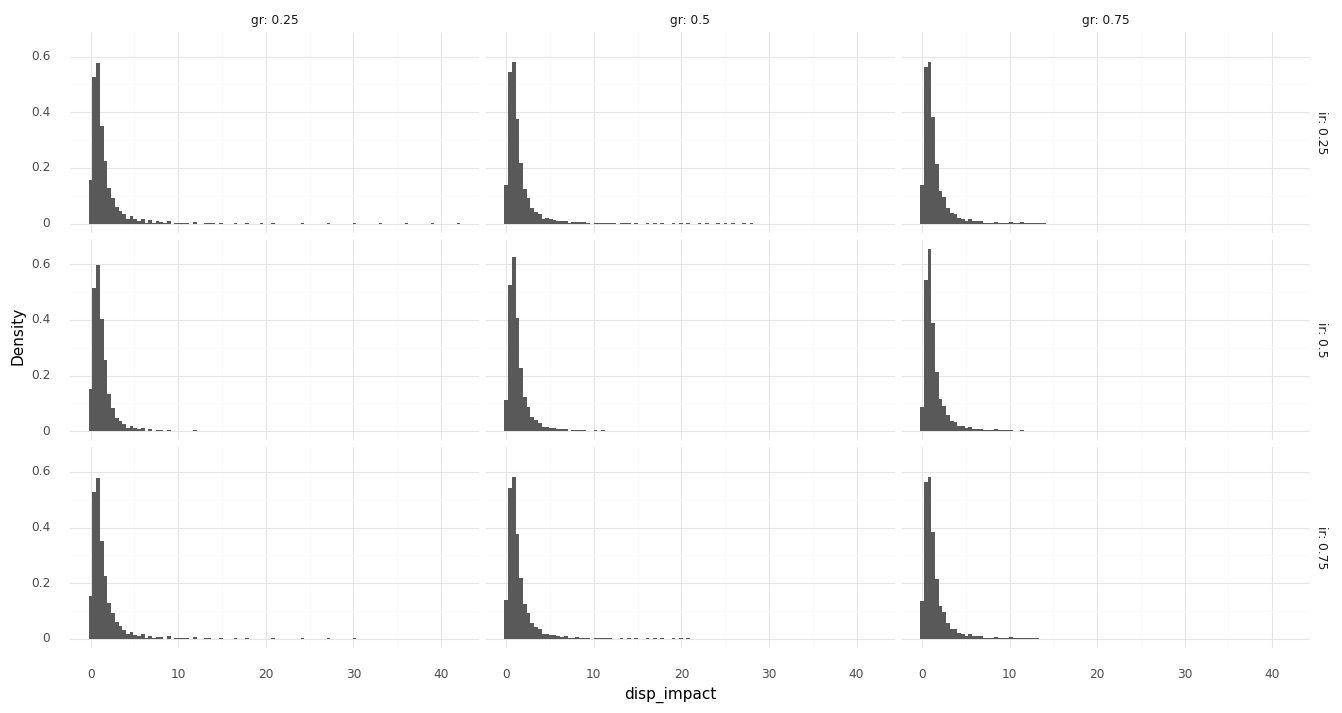

In [9]:
plot_plot(df, 'disp_impact')

In [6]:
with open("acc_equality_ratio.bin", "rb") as f:
    acc_equality_ratio = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["acc_equality_ratio"])

In [7]:
df = pd.concat([gr, ir], axis=1)
df = pd.concat([df, acc_equality_ratio], axis=1)

In [8]:
ir_selected = [0.25, 0.5, 0.75]
gr_selected = [0.25, 0.5, 0.75]
df = df.loc[df.ir.isin(ir_selected) & df.gr.isin(gr_selected) & (~df['acc_equality_ratio'].isna())]

In [9]:
df

,gr,ir,acc_equality_ratio
116160,0.25,0.75,0.000000
116161,0.25,0.75,0.071411
116163,0.25,0.75,0.142822
116166,0.25,0.75,0.214233
116170,0.25,0.75,0.285645
...,...,...,...
552946150,0.75,0.50,inf
552946164,0.75,0.75,inf
552946178,0.75,0.25,inf
552946192,0.75,0.50,inf


### Accuracy equality ratio without Nan

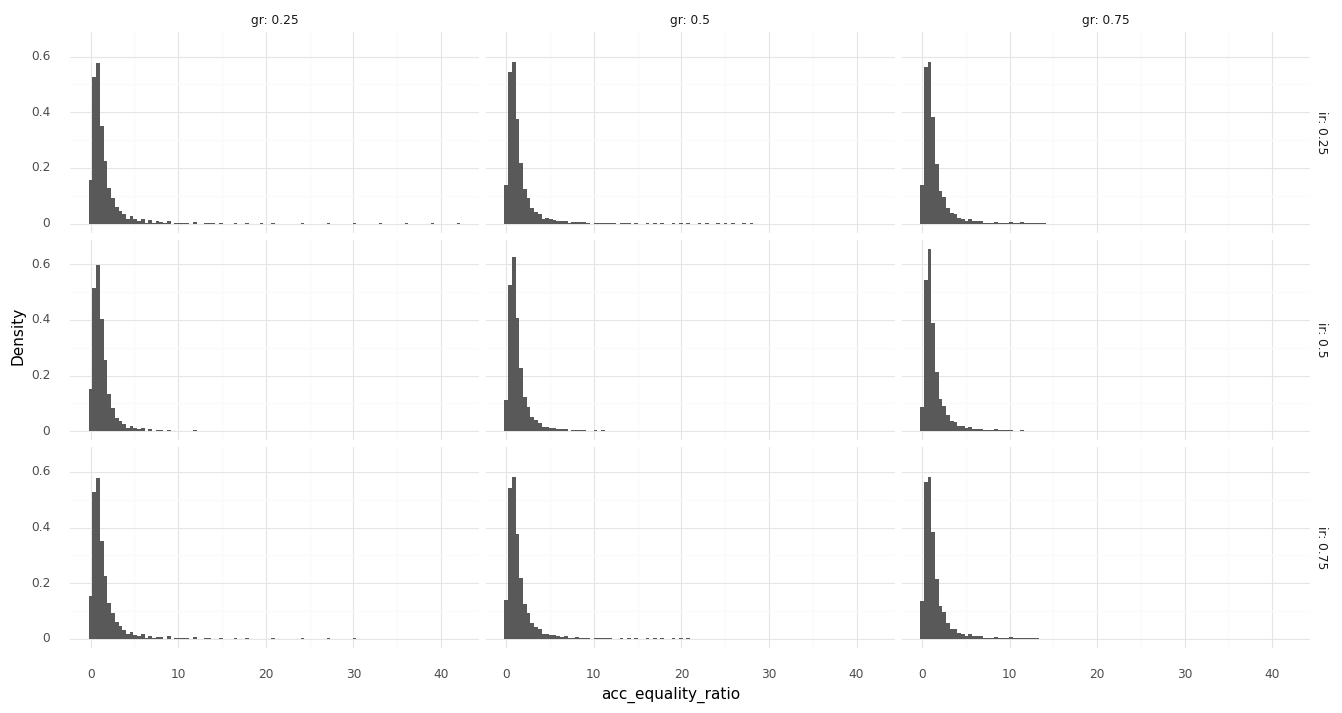

In [10]:
plot_plot(df, 'acc_equality_ratio')

In [5]:
with open("acc_equality_diff.bin", "rb") as f:
    acc_equality_diff = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["acc_equality_diff"])

In [6]:
df = pd.concat([gr, ir], axis=1)
df = pd.concat([df, acc_equality_diff], axis=1)

In [7]:
ir_selected = [0.25, 0.5, 0.75]
gr_selected = [0.25, 0.5, 0.75]
df = df.loc[df.ir.isin(ir_selected) & df.gr.isin(gr_selected) & (~df['acc_equality_diff'].isna())]

In [8]:
df

,gr,ir,acc_equality_diff
116160,0.25,0.75,-1.000000
116161,0.25,0.75,-0.928711
116163,0.25,0.75,-0.856934
116166,0.25,0.75,-0.785645
116170,0.25,0.75,-0.714355
...,...,...,...
552946150,0.75,0.50,0.643066
552946164,0.75,0.75,0.309570
552946178,0.75,0.25,1.000000
552946192,0.75,0.50,0.666504


### Accuracy equality difference without Nan

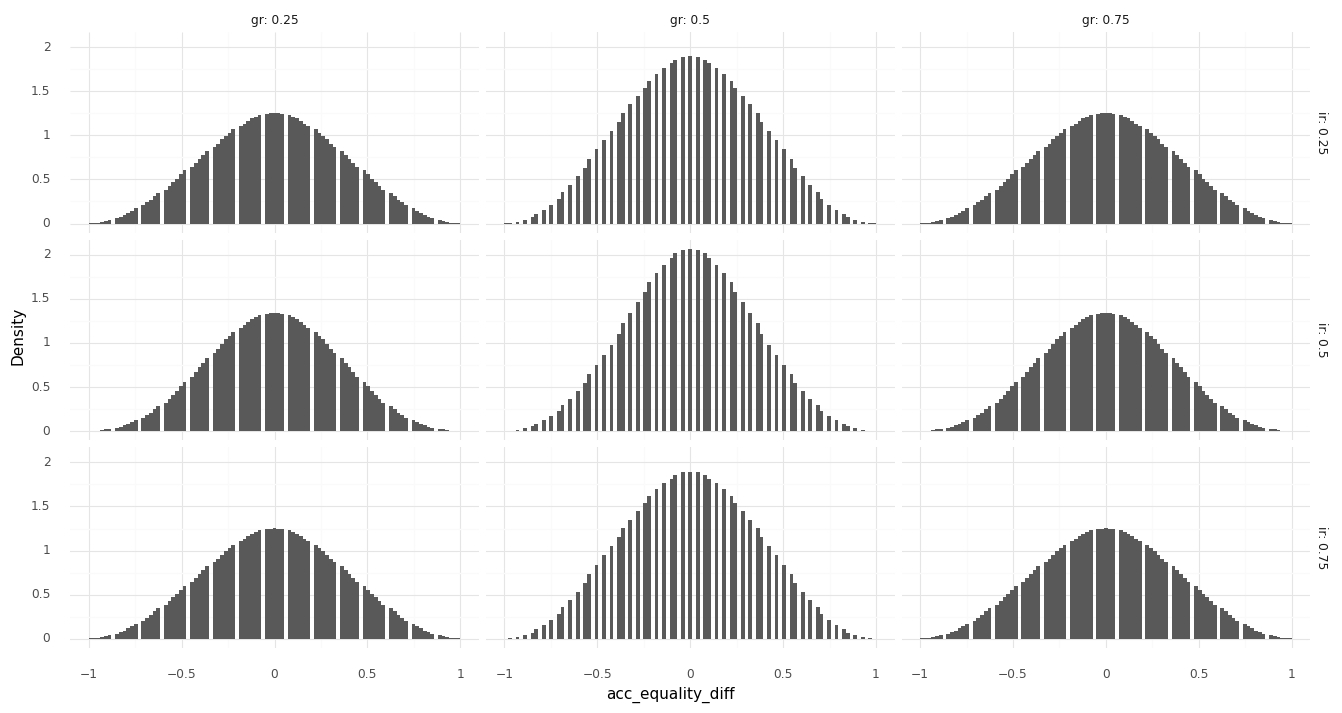

In [9]:
plot_plot(df, 'acc_equality_diff')

In [5]:
with open("pred_equality_ratio.bin", "rb") as f:
    pred_equality_ratio = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["pred_equality_ratio"])

In [6]:
df = pd.concat([gr, ir], axis=1)
df = pd.concat([df, pred_equality_ratio], axis=1)

In [7]:
ir_selected = [0.25, 0.5, 0.75]
gr_selected = [0.25, 0.5, 0.75]
df = df.loc[df.ir.isin(ir_selected) & df.gr.isin(gr_selected) & (~df['pred_equality_ratio'].isna())]

In [8]:
df

,gr,ir,pred_equality_ratio
154815,0.25,0.75,1.000000
154816,0.25,0.75,0.922852
154818,0.25,0.75,0.846191
154821,0.25,0.75,0.769043
154825,0.25,0.75,0.692383
...,...,...,...
552490984,0.75,0.50,inf
552490998,0.75,0.75,inf
552491011,0.75,0.25,inf
552491025,0.75,0.50,inf


### Accuracy equality difference without Nan

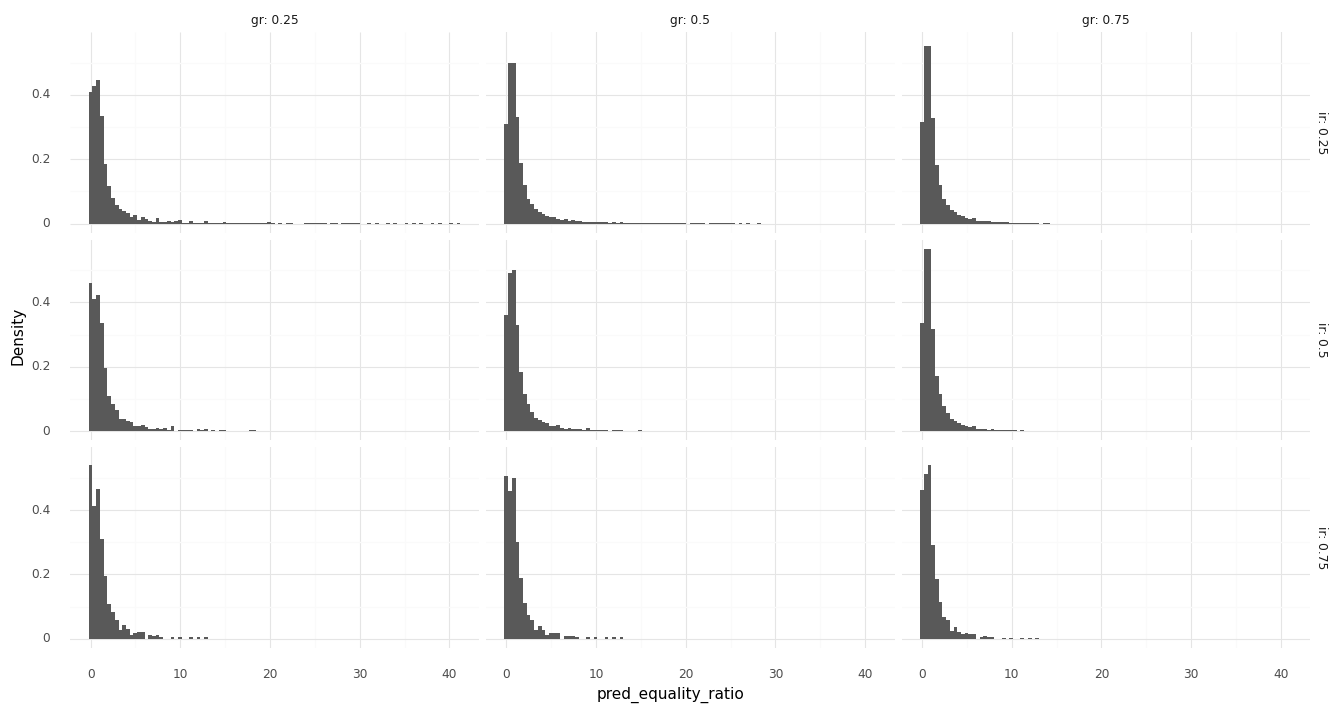

In [9]:
plot_plot(df, 'pred_equality_ratio')

## p.s. wtf wrong with garbage collector
## p.p.s at least write a separate function for cells below, when time will be

In [5]:
with open("pred_equality_diff.bin", "rb") as f:
    pred_equality_diff = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["pred_equality_diff"])

In [6]:
df = pd.concat([gr, ir], axis=1)
df = pd.concat([df, pred_equality_diff], axis=1)

In [7]:
ir_selected = [0.25, 0.5, 0.75]
gr_selected = [0.25, 0.5, 0.75]
df = df.loc[df.ir.isin(ir_selected) & df.gr.isin(gr_selected) & (~df['pred_equality_diff'].isna())]

In [8]:
df

,gr,ir,pred_equality_diff
154815,0.25,0.75,0.000000
154816,0.25,0.75,-0.076904
154818,0.25,0.75,-0.153809
154821,0.25,0.75,-0.230713
154825,0.25,0.75,-0.307617
...,...,...,...
552491025,0.75,0.50,0.037048
552491039,0.75,0.75,0.076904
552491053,0.75,0.25,0.000000
552491067,0.75,0.50,0.000000


### Accuracy equality difference without Nan

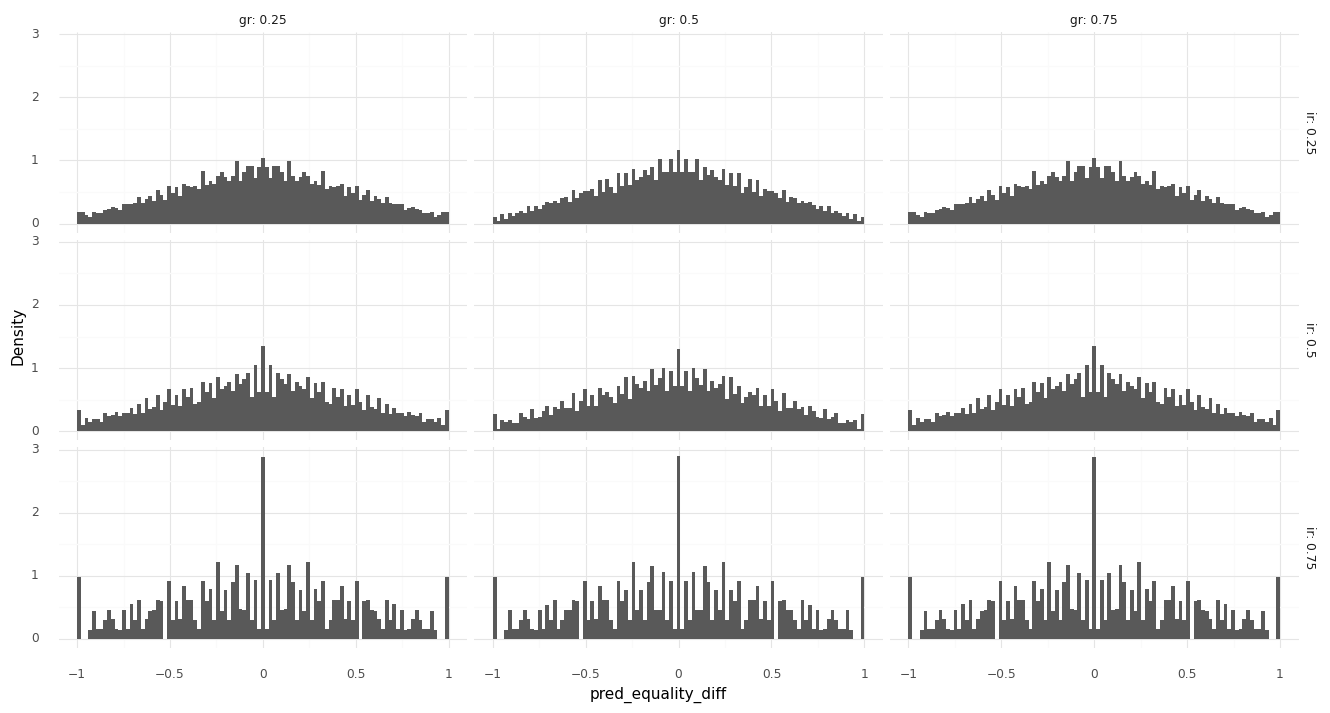

In [9]:
plot_plot(df, 'pred_equality_diff')

In [6]:
with open("pred_parity_ratio.bin", "rb") as f:
    pred_parity_ratio = pd.DataFrame(np.fromfile(f).astype(np.float16), columns = ["pred_parity_ratio"])

In [7]:
df = pd.concat([gr, ir], axis=1)
df = pd.concat([df, pred_parity_ratio], axis=1)

In [8]:
ir_selected = [0.25, 0.5, 0.75]
gr_selected = [0.25, 0.5, 0.75]
df = df.loc[df.ir.isin(ir_selected) & df.gr.isin(gr_selected) & (~df['pred_parity_ratio'].isna())]

In [9]:
df

,gr,ir,pred_parity_ratio
116160,0.25,0.75,0.0
116161,0.25,0.75,0.0
116163,0.25,0.75,0.0
116166,0.25,0.75,0.0
116170,0.25,0.75,0.0
...,...,...,...
547028568,0.75,0.50,inf
547028582,0.75,0.75,inf
547028595,0.75,0.25,inf
547028609,0.75,0.50,inf


### Accuracy equality difference without Nan

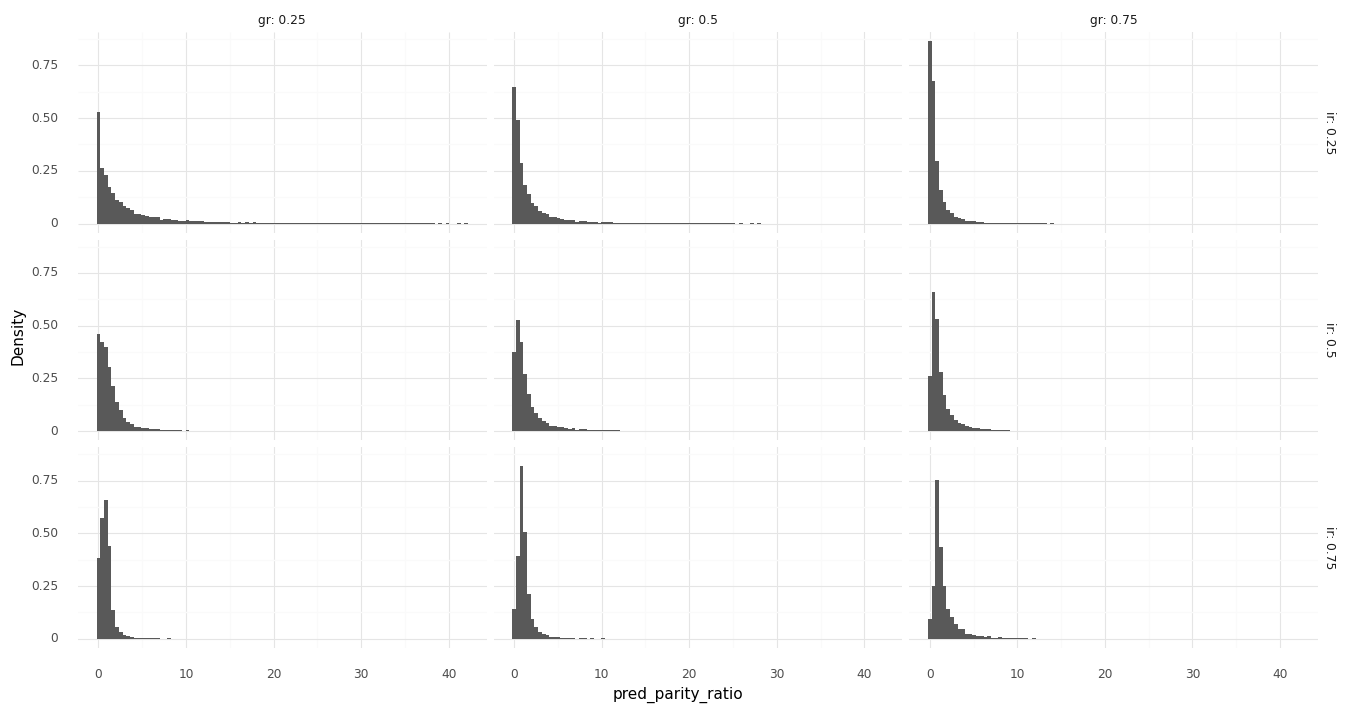

In [10]:
plot_plot(df, 'pred_parity_ratio')